# Import modules

In [1]:
import pandas as pd
import numpy as np

# our modules
import sys
sys.path.insert(0, '..')

# user defined
from clean import clean_data
from imbalance import balance_data
from evaluate import evaluate_model
from model import save_model

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# TensorFlow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


# pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

2023-07-02 16:07:36.027069: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-02 16:07:36.050276: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-02 16:07:36.162253: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-02 16:07:36.163290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 16:07:36.754155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
pd.set_option("display.precision", 6)
pd.set_option("display.float_format", lambda x: "%.6f" % x)

In [3]:
RANDOM_STATE = 123

# Load data

In [4]:
data = pd.read_csv('/home/hristo/Documents/WBS_Data_Science/WBS_Predictive_Maintenance/data/ai4i2020.csv', index_col='UDI')

In [5]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0,0
2,L47181,L,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0,0
3,L47182,L,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0,0
4,L47183,L,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0,0
5,L47184,L,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.800000,308.400000,1604,29.500000,14,0,0,0,0,0,0
9997,H39410,H,298.900000,308.400000,1632,31.800000,17,0,0,0,0,0,0
9998,M24857,M,299.000000,308.600000,1645,33.400000,22,0,0,0,0,0,0


# Clean data

In [6]:
data_cl = clean_data(data, drop_type=True, multi=True)
data_cl

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,
1,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0
2,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0
3,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0
4,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0
5,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14,0,0,0,0,0
9997,298.900000,308.400000,1632,31.800000,17,0,0,0,0,0
9998,299.000000,308.600000,1645,33.400000,22,0,0,0,0,0


# Prepare data

In [7]:
X = data_cl.copy()
y = X[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].copy()
X.drop(columns=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], inplace=True)

In [8]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UDI,,,,,
1,298.100000,308.600000,1551,42.800000,0
2,298.200000,308.700000,1408,46.300000,3
3,298.100000,308.500000,1498,49.400000,5
4,298.200000,308.600000,1433,39.500000,7
5,298.200000,308.700000,1408,40.000000,9
...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14
9997,298.900000,308.400000,1632,31.800000,17
9998,299.000000,308.600000,1645,33.400000,22


## Scale data

In [9]:
def scale_data(data):
    data = data.copy()
    return StandardScaler().fit_transform(data)

In [10]:
X_sc = scale_data(X)

In [11]:
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [12]:
X_sc

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
UDI,,,,,
1,-0.952389,-0.947360,0.068185,0.282200,-1.695984
2,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
3,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
4,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
5,-0.902393,-0.879959,-0.729472,0.001313,-1.554588
...,...,...,...,...,...
9996,-0.602417,-1.082162,0.363820,-1.052012,-1.476034
9997,-0.552421,-1.082162,0.520005,-0.821283,-1.428902
9998,-0.502425,-0.947360,0.592519,-0.660777,-1.350349


# Split train and test

## without balancing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, train_size=0.8, random_state=RANDOM_STATE)

## with balancing

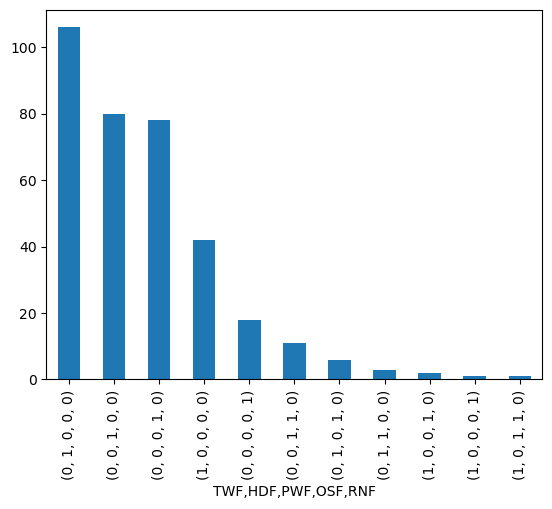

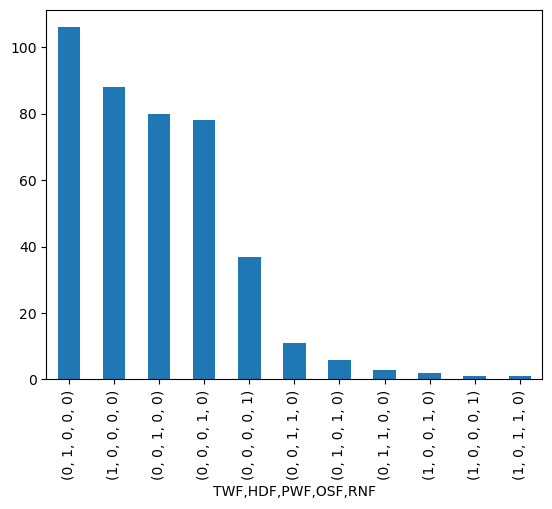

In [14]:
balance = True
if balance:
    Xc = X.copy()
    yc = y.copy()

    y_c_1 = yc.copy()
    y_c_1 = y_c_1.loc[~(y_c_1 == 0).all(axis=1)]
    # print(y_c_1)
    y_c_1.value_counts().plot(kind='bar')
    plt.show()

    data_bal, method = balance_data(Xc, yc, RANDOM_STATE, 'MLSMOTE')
    X_bl, y_bl = data_bal

    X_bl = pd.DataFrame(X_bl, columns=X.columns)
    y_bl = pd.DataFrame(y_bl, columns=y.columns)

    # print(X_bl.info())
    # print(y_bl.info())

    y_bl_1 = y_bl.copy()
    y_bl_1 = y_bl_1.loc[~(y_bl_1 == 0).all(axis=1)]
    # print(y_bl_1)
    y_bl_1.value_counts().plot(kind='bar')
    plt.show()

    X_train, X_test, y_train, y_test = train_test_split(X_bl, y_bl, train_size=0.8, random_state=RANDOM_STATE)

# Baseline model

In [15]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=40, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [16]:
input_shape = X.shape[1]
n_labels = y.shape[1]

In [17]:
n_nodes = 512

In [18]:
n_hidden = 2

In [19]:
n_epochs = 200

In [28]:
def run_model(X_train, y_train, X_test, y_test, n_nodes, n_hidden, input_shape, n_epochs, n_labels, batch_size=int(n_nodes/2)):
    ''' compute deep learning model(s)'''

    model = keras.Sequential([
        layers.Dense(n_nodes, activation='relu', input_shape=[input_shape]),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_labels, activation='sigmoid'),
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=n_epochs,
        callbacks=[early_stopping],
        verbose=0
    )

    predictions = model.predict(X_test)
    predictions = pd.DataFrame(predictions, index=y_test.index, columns=y_test.columns)

    return history, model, predictions

In [29]:
history, model, predictions = run_model(X_train, y_train, X_test, y_test, n_nodes, n_hidden, input_shape, n_epochs, n_labels)

history_df = pd.DataFrame(history.history)

63/63 [==============================] - 0s 1ms/step


In [30]:
pred_vals = pd.DataFrame(predictions.round(), index=y_test.index, columns=y_test.columns)
pred_vals.describe()

,TWF,HDF,PWF,OSF,RNF
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
mean,0.001987,0.000000,0.006955,0.007452,0.000000
std,0.044544,0.000000,0.083126,0.086021,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.000000,1.000000,1.000000,0.000000


In [31]:
accuracy = accuracy_score(y_test, pred_vals)
print(accuracy)

0.96274217585693


In [32]:
for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], pred_vals.iloc[:, i])
    print(f'{y_test.columns[i]} - {100*accuracy} %')

TWF - 98.80774962742176 %
HDF - 99.00645802285146 %
PWF - 98.95678092399403 %
OSF - 99.60258320914058 %
RNF - 99.70193740685544 %


Minimum validation loss: 2.351169%
Maximum validation accuracy: 99.354196%
Maximum binary accuracy: 99.326867%


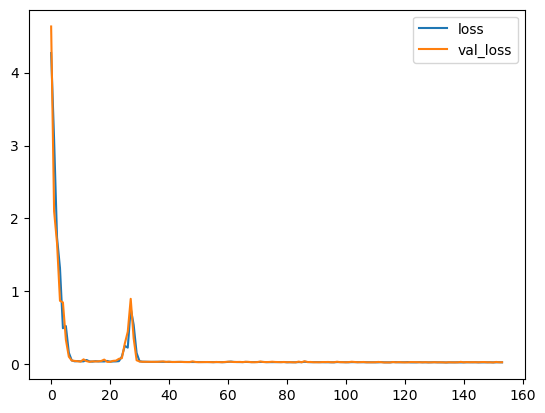

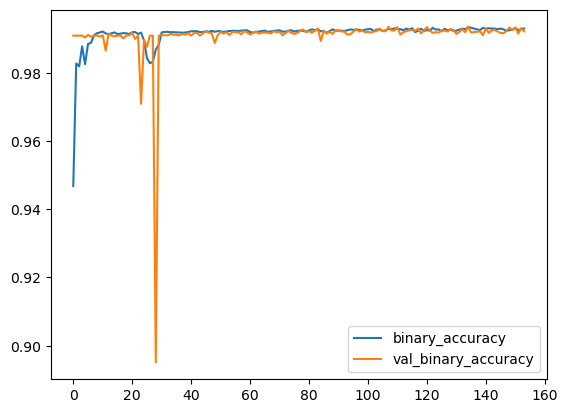

In [33]:
# history_df.loc[:, ['loss', 'val_loss']].plot()
# plt.ylim([0, 1])
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(f"Minimum validation loss: {history_df['val_loss'].min():.6%}")
print(f"Maximum validation accuracy: {history_df['val_binary_accuracy'].max():.6%}")
print(f"Maximum binary accuracy: {history_df['binary_accuracy'].max():.6%}")

# save model

In [34]:
model

In [35]:
save_model(model, 'DL_balanced_multi.joblib')